# Application: Estimating $H_0$ from Type Ia Supernovae

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data = np.genfromtxt("SCPUnion2_mu_vs_z.txt",
                    dtype=[("name", "S6"), ("z", "f8"), ("mu", "f8"), ("dmu", "f8")])

Text(0, 0.5, '$\\mu$')

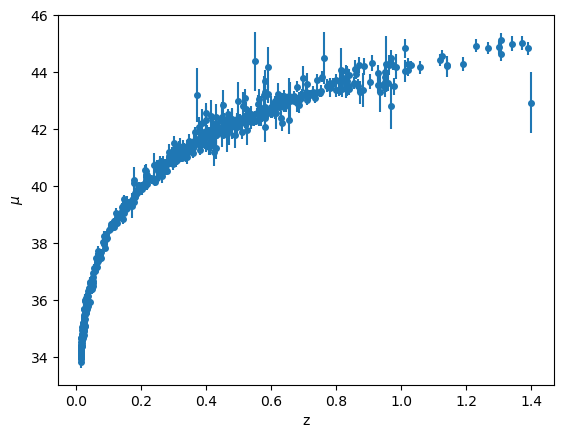

In [6]:
fig, ax = plt.subplots()
ax.errorbar(data["z"], data["mu"], yerr=data["dmu"], fmt="o", ms=4)
ax.set_xlabel("z")
ax.set_ylabel(r"$\mu$")

The basic idea is that we have the [distance modulus](https://en.wikipedia.org/wiki/Distance_modulus), which is related to the magnitudes via:

$$\mu = m - M = 5 \log_{10} \left (\frac{d}{10~\mbox{pc}}\right )$$

Since cosmologists usually work in terms of Mpc, let's rewrite this as:

$$\mu = m - M = 5 \log_{10} \left (\frac{d}{10~\mbox{pc}}\right ) 
    + 5 \log_{10} \left ( \frac{1~\mbox{Mpc}}{1~\mbox{Mpc}}\right )
    = 5 \log_{10} \left (\frac{d}{1~\mbox{Mpc}}\right ) + 25$$

Now, in an expanding Universe, the distance that goes here is the [luminosity distance](https://en.wikipedia.org/wiki/Luminosity_distance) which can be expressed via an expansion in redshift as:

$$d_L \approx \frac{c}{H_0} \left [ z + \frac{1}{2} (1 - q_0) z^2 + \ldots \right ]$$

We'll consider the local Universe, where curvature effects (the $q_0$ term) are not important.  So we'll restrict ourselves to $z < 0.05$.

Let's extract this data and then look at the supernova

In [53]:
idx = data["z"] < 0.1
idx_sort = np.argsort(data["z"][idx])
zs = data["z"][idx][idx_sort]
mus = data["mu"][idx][idx_sort]
dmus = data["dmu"][idx][idx_sort]

Text(0, 0.5, '$\\mu$')

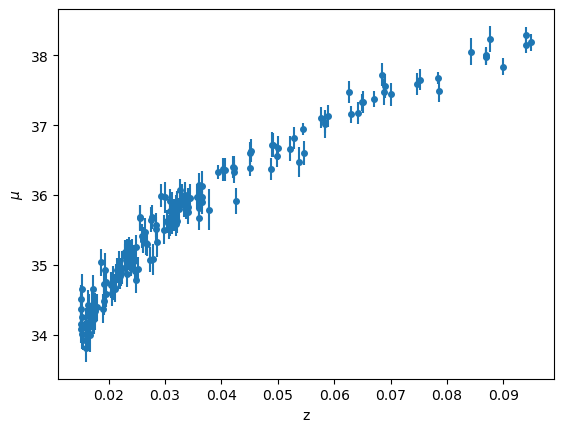

In [54]:
fig, ax = plt.subplots()
ax.errorbar(zs, mus, yerr=dmus, fmt="o", ms=4)
ax.set_xlabel("z")
ax.set_ylabel(r"$\mu$")

So we want to fit:

$$\mu = 5\log_{10} \left (\frac{cz}{H_0 \cdot 1~\mbox{Mpc}} \right ) + 25$$

which we'll write as:

$$\mu = 5\log_{10} (\alpha z) + 25$$

This is a nonlinear expression in terms of the fit parameter, $\alpha$.  Once we get $\alpha$, we can get Hubble's constant as:

$$H_0 = \frac{c}{\alpha \cdot 1~\mbox{Mpc}}$$

Now we can put a fitting function

In [55]:
from scipy import optimize

In [56]:
def resid(avec, z, mu, dmu):
    return (mu - (5 * np.log10(avec[0] * z * (1 + 0.5 * (1 - avec[1]) * z)) + 25)) / dmu

In [57]:
# imagine H0 = 50
c = 3.e5
H0_guess = 50

a0 = c / H0_guess
a1 = 1

In [58]:
afit, flag = optimize.leastsq(resid, [a0, a1], args=(zs, mus, dmus))


In [59]:
afit

array([4.33772046e+03, 8.70168650e-02])

In [60]:
H0 = c / afit[0]
H0

69.16074993479117

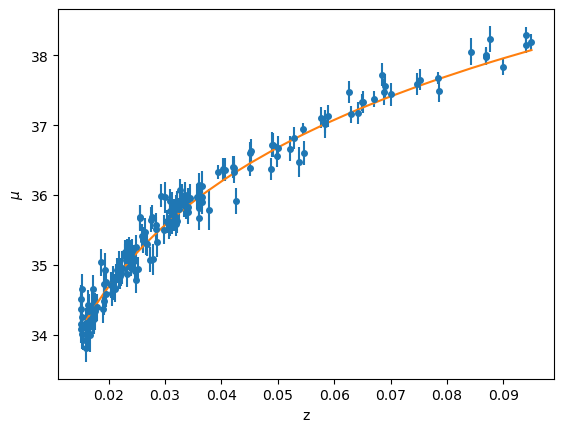

In [61]:
ax.plot(zs, 5 * np.log10(afit[0] * zs) + 25)
fig